In [47]:
import pandas as pd



# Basic read
df = pd.read_csv('./data/equity-post-HCT-survival-predictions/train.csv')
df.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [16]:

# Basic read
df = pd.read_csv('./data/equity-post-HCT-survival-predictions/test.csv')
df.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


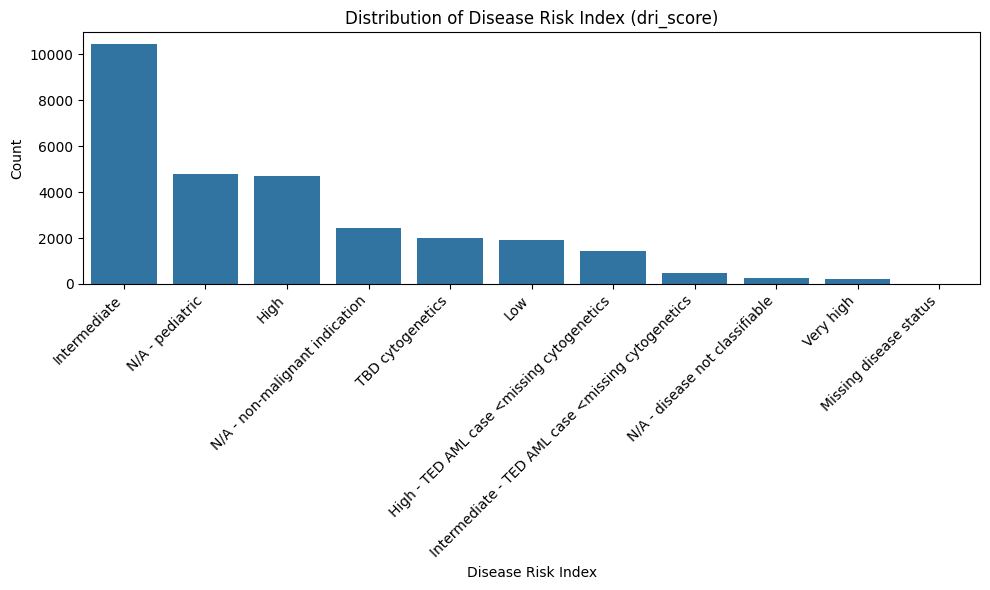

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dri_score', order=df['dri_score'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Disease Risk Index (dri_score)')
plt.xlabel('Disease Risk Index')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

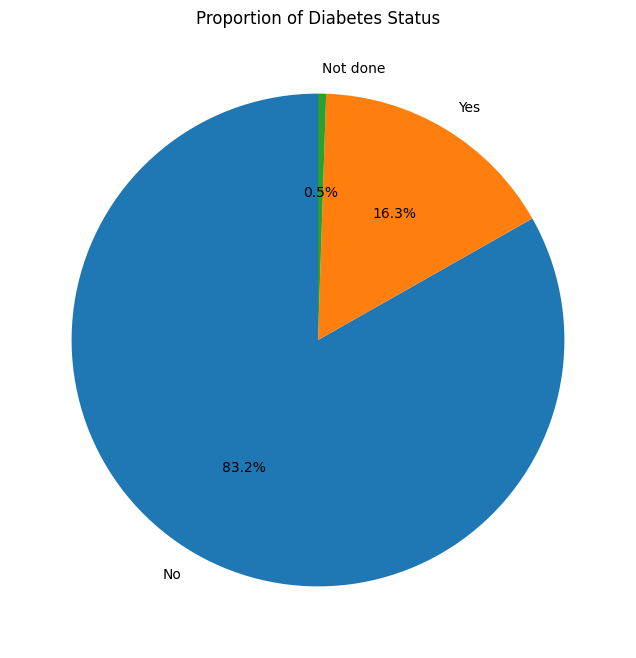

In [6]:
plt.figure(figsize=(8, 8))
df['diabetes'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Diabetes Status')
plt.ylabel('')  # Remove y-label for cleaner look
plt.show()

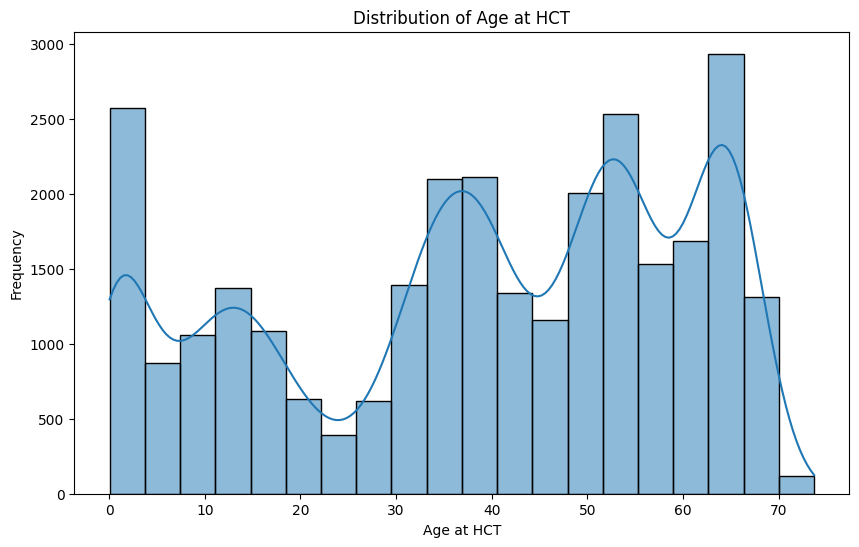

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age_at_hct', bins=20, kde=True)
plt.title('Distribution of Age at HCT')
plt.xlabel('Age at HCT')
plt.ylabel('Frequency')
plt.show()

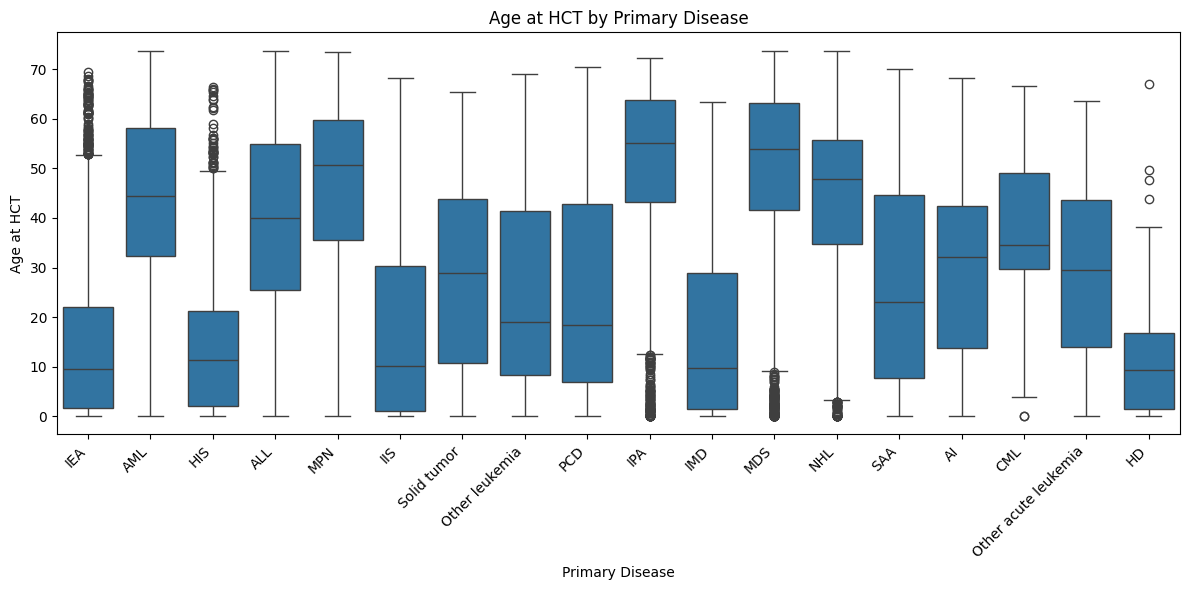

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='prim_disease_hct', y='age_at_hct')
plt.xticks(rotation=45, ha='right')
plt.title('Age at HCT by Primary Disease')
plt.xlabel('Primary Disease')
plt.ylabel('Age at HCT')
plt.tight_layout()
plt.show()

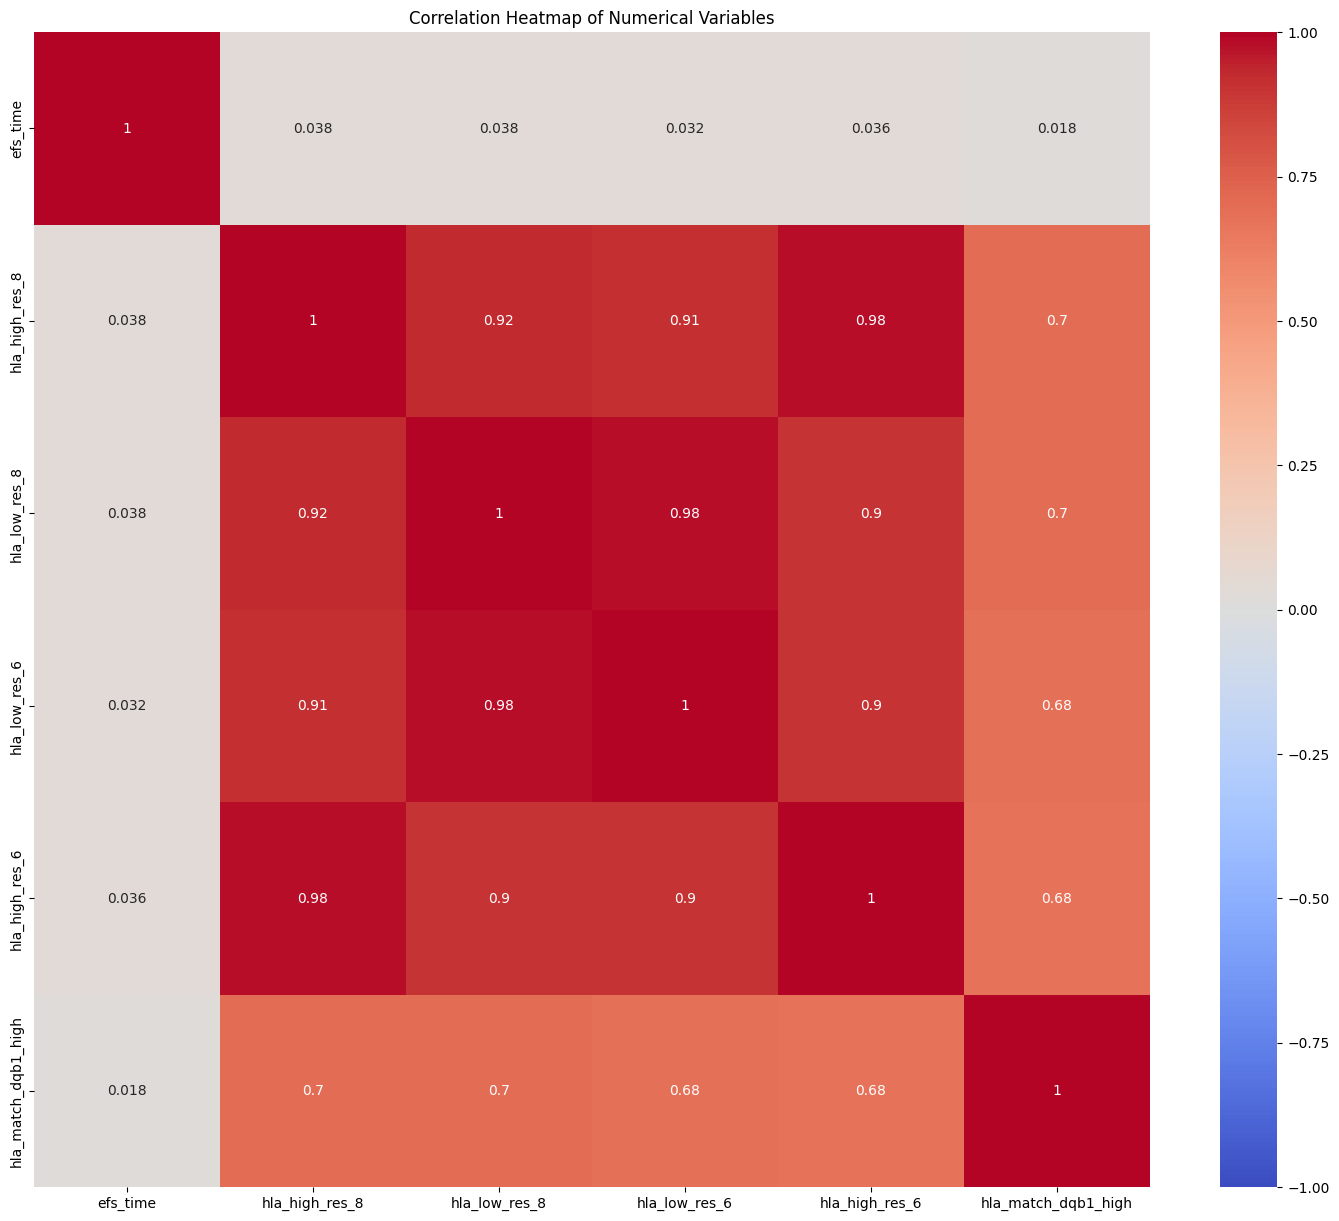

In [42]:
plt.figure(figsize=(18, 15))
numerical_cols = ['efs_time', 'hla_high_res_8', 'hla_low_res_8', 'hla_low_res_6', 'hla_high_res_6', 'hla_match_dqb1_high']
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

<Figure size 1200x600 with 0 Axes>

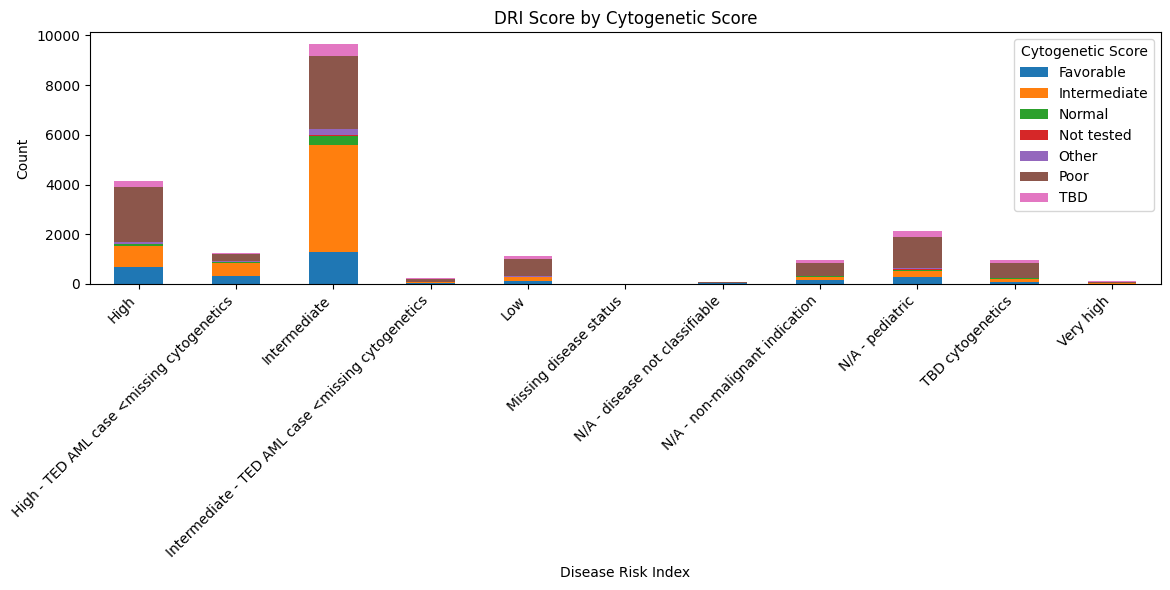

In [13]:
plt.figure(figsize=(12, 6))
cross_tab = pd.crosstab(df['dri_score'], df['cyto_score'])
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
plt.title('DRI Score by Cytogenetic Score')
plt.xlabel('Disease Risk Index')
plt.ylabel('Count')
plt.legend(title='Cytogenetic Score')
plt.tight_layout()
plt.show()

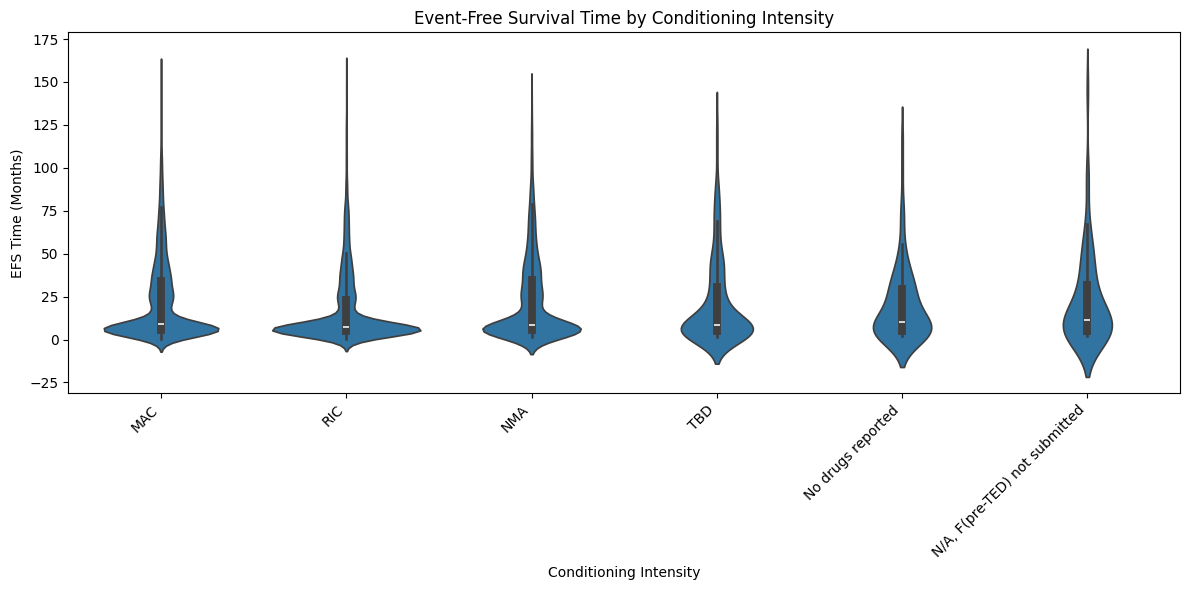

In [14]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='conditioning_intensity', y='efs_time')
plt.xticks(rotation=45, ha='right')
plt.title('Event-Free Survival Time by Conditioning Intensity')
plt.xlabel('Conditioning Intensity')
plt.ylabel('EFS Time (Months)')
plt.tight_layout()
plt.show()

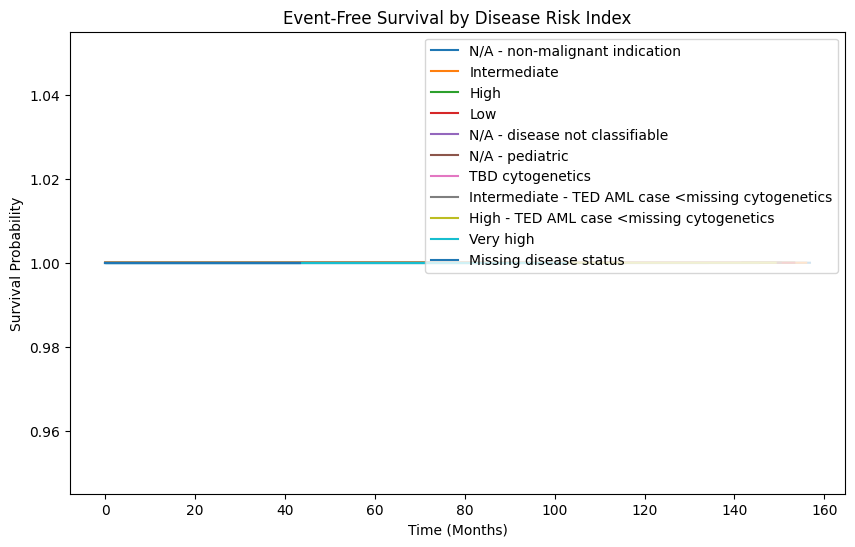

In [15]:
from lifelines import KaplanMeierFitter

plt.figure(figsize=(10, 6))
kmf = KaplanMeierFitter()
for dri in df['dri_score'].dropna().unique():
    mask = df['dri_score'] == dri
    kmf.fit(df.loc[mask, 'efs_time'], event_observed=(df.loc[mask, 'efs'] == 'Event'), label=dri)
    kmf.plot_survival_function()

plt.title('Event-Free Survival by Disease Risk Index')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

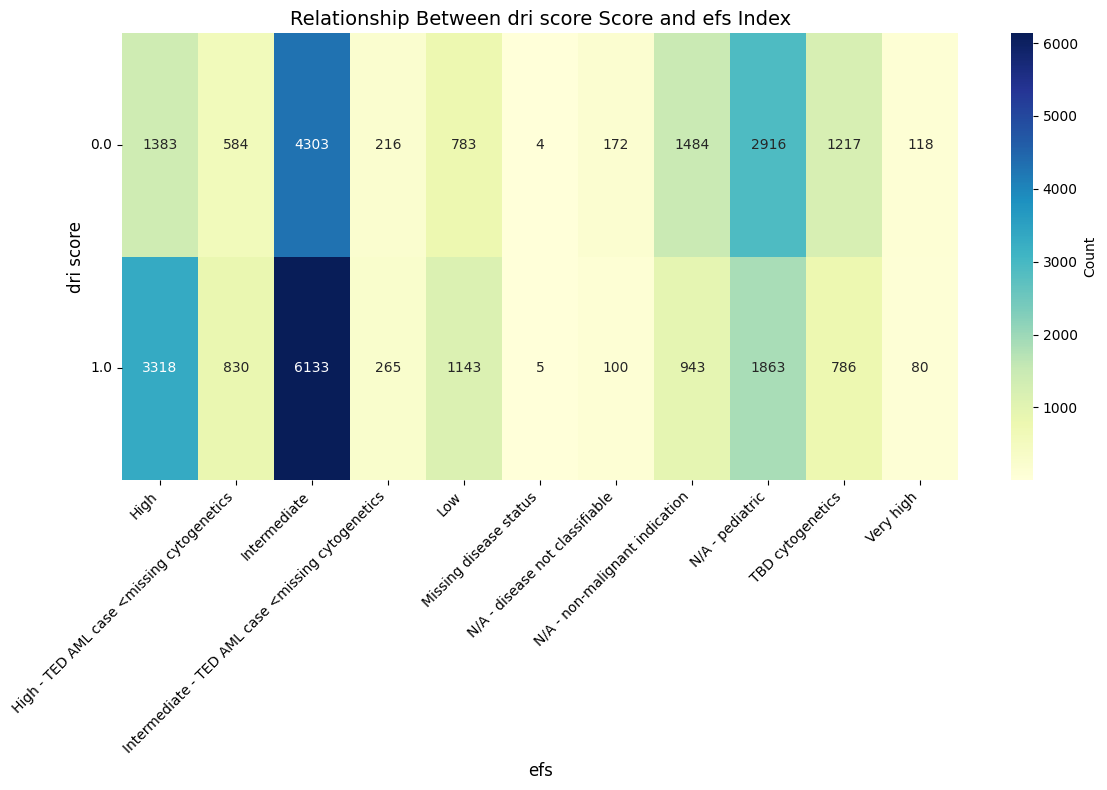

In [31]:
def plot_dri_relationship(feature):
    

    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df['efs'], df['dri_score'])

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})
    plt.title('Relationship Between dri score Score and efs Index', fontsize=14)
    plt.xlabel('efs', fontsize=12)
    plt.ylabel('dri score', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Show the plot
    plt.show()
    
plot_dri_relationship('arrhythmia')


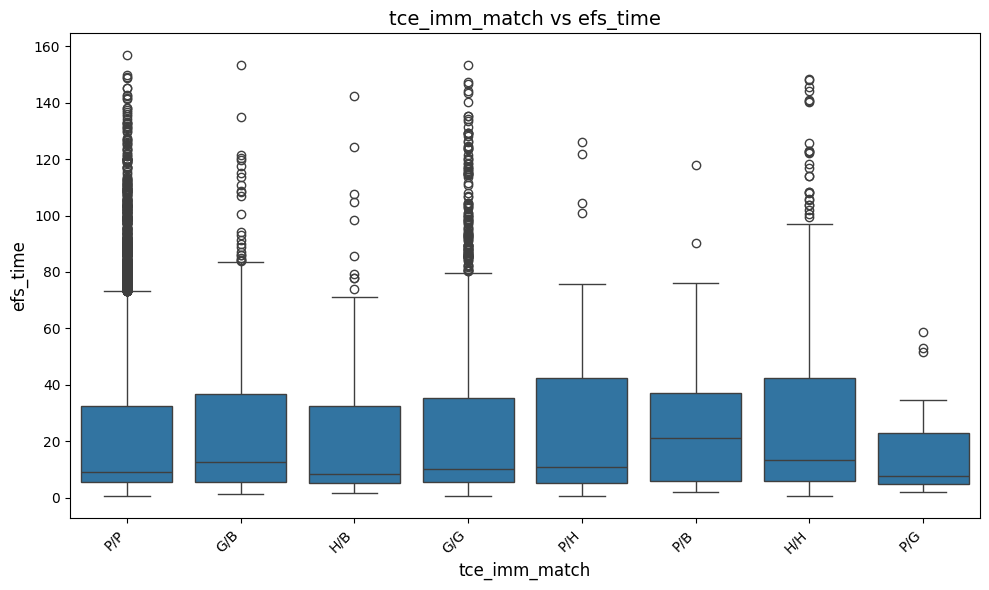

In [35]:
# Function to plot categorical vs numerical
def plot_categorical_vs_numerical(df, cat_var, num_var):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_var, y=num_var, data=df)
    plt.title(f'{cat_var} vs {num_var}', fontsize=14)
    plt.xlabel(cat_var, fontsize=12)
    plt.ylabel(num_var, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Function to plot numerical vs numerical
def plot_numerical_vs_numerical(df, num_var_x, num_var_y):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=num_var_x, y=num_var_y, data=df)
    plt.title(f'{num_var_x} vs {num_var_y}', fontsize=14)
    plt.xlabel(num_var_x, fontsize=12)
    plt.ylabel(num_var_y, fontsize=12)
    plt.tight_layout()
    plt.show()
    
    
var='tce_imm_match'
plot_categorical_vs_numerical(df, var, 'efs_time')

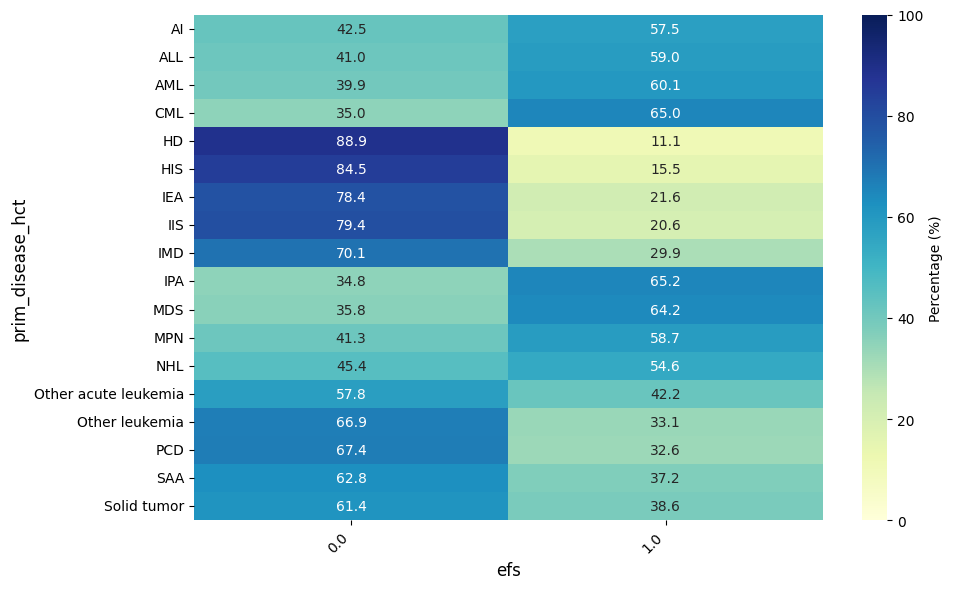

In [36]:
def plot_cyto_relationship(feature):
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df['efs'])
    
    # Convert to proportions (percentage surviving = 'Censoring' / total per cyto_score)
    proportion_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(proportion_table, annot=True, fmt='.1f', cmap='YlGnBu', 
                cbar_kws={'label': 'Percentage (%)'},
                vmin=0, vmax=100)  # Set scale from 0% to 100%
    plt.title('', fontsize=14)
    plt.xlabel('efs', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Call the function with 'efs' as the feature
plot_cyto_relationship('prim_disease_hct')

In [32]:
test = pd.read_csv('./data/equity-post-HCT-survival-predictions/test.csv')

test.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


- hla_match_a_high: This measures how well the recipient and the first donor match at the HLA-A locus using high-resolution (- allele-level) testing. It’s a numerical value, likely reflecting the degree of match (e.g., number of alleles matched out of a - possible total).
- hla_match_b_high: Same idea, but for the HLA-B locus at high resolution. Again, a numerical score showing the match level.
- hla_match_c_high: High-resolution matching at HLA-C. This is another numerical indicator of compatibility at this specific locus.
- hla_match_drb1_high: High-resolution matching at HLA-DRB1, a key locus in immune response regulation, with a numerical value.
- hla_match_dqb1_high: High-resolution matching at HLA-DQB1, another important locus, also numerical.
- hla_match_a_low: Matching at HLA-A, but at low resolution (antigen-level, less detailed than allele-level), numerical.
- hla_match_b_low: Low-resolution matching at HLA-B, numerical.
- hla_match_c_low: Low-resolution matching at HLA-C, numerical.
hla_match_drb1_low: Low-resolution matching at HLA-DRB1, numerical.
- hla_match_dqb1_low: Low-resolution matching at HLA-DQB1, numerical.
- hla_high_res_6: This looks at high-resolution matching across three loci: HLA-A, HLA-B, and HLA-DRB1. The "6" refers to the six - alleles (two per locus, one from each chromosome) being compared between recipient and donor. It’s a numerical score.
- hla_high_res_8: Expands to four loci: HLA-A, HLA-B, HLA-C, and HLA-DRB1 (eight alleles total), assessed at high resolution, numerical.
- hla_high_res_10: Covers five loci: HLA-A, HLA-B, HLA-C, HLA-DRB1, and HLA-DQB1 (ten alleles), at high resolution, numerical.
hla_low_res_6: Low-resolution matching at HLA-A, HLA-B, and HLA-DRB1 (six antigens), numerical.
- hla_low_res_8: Low-resolution matching at HLA-A, HLA-B, HLA-C, and HLA-DRB1 (eight antigens), numerical.
- hla_low_res_10: Appears to be low-resolution matching across five loci (ten antigens), though the description is missing—it’s likely - HLA-A, HLA-B, HLA-C, HLA-DRB1, and HLA-DQB1, numerical.
- hla_nmdp_6: Matching based on National Marrow Donor Program (NMDP) standards, using low resolution for HLA-A and HLA-B, and high resolution for HLA-DRB1. Numerical score.

/var/folders/xb/yw98_1g1447cydmz113qf0pm0000gn/T/ipykernel_34814/3912714311.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


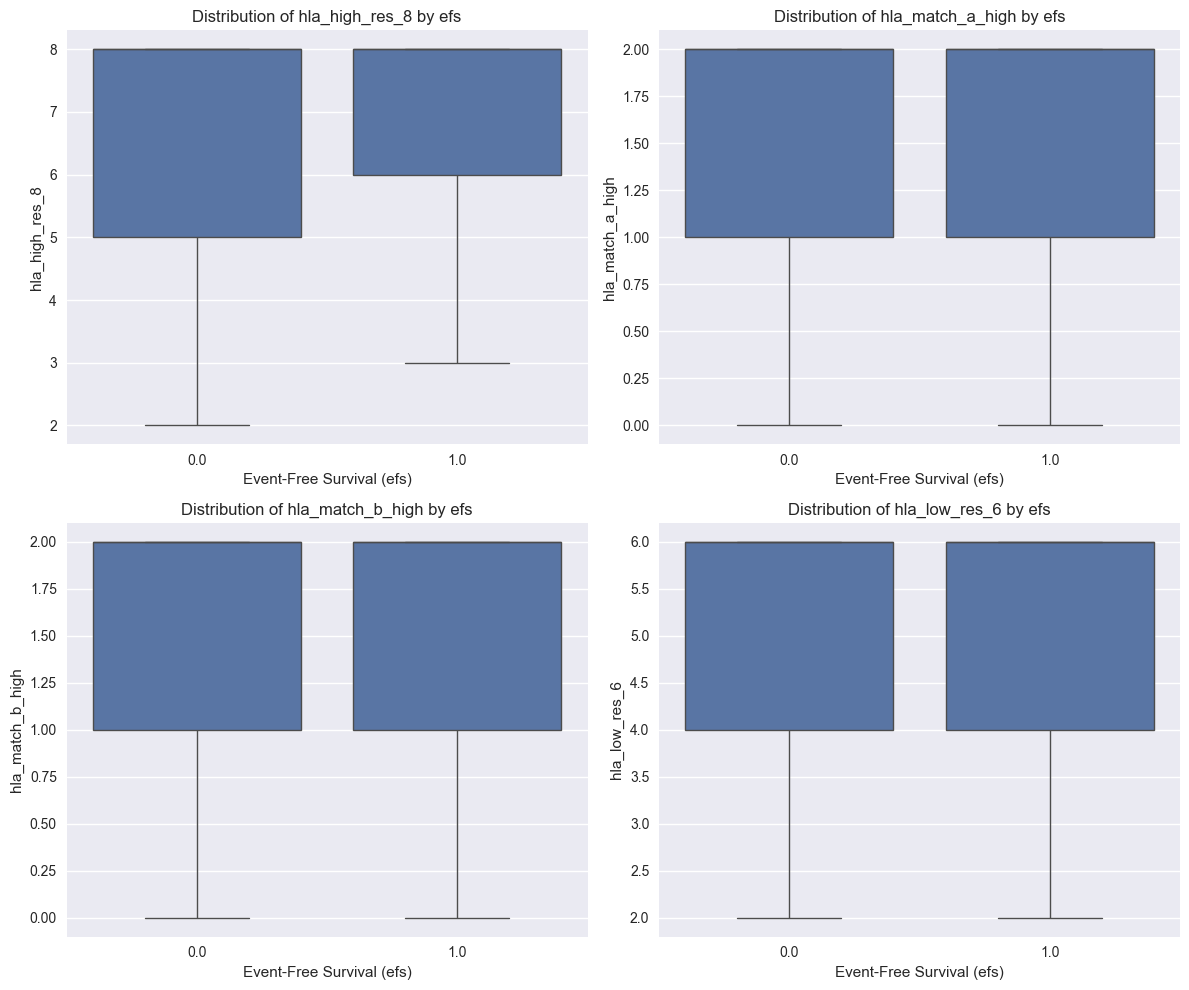

In [58]:
hla_features = ['hla_high_res_8', 'hla_match_a_high', 'hla_match_b_high', 'hla_low_res_6']

# Set up the plotting style
plt.style.use('seaborn')
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot boxplots for each HLA feature
for i, feature in enumerate(hla_features):
    sns.boxplot(x='efs', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by efs')
    axes[i].set_xlabel('Event-Free Survival (efs)')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

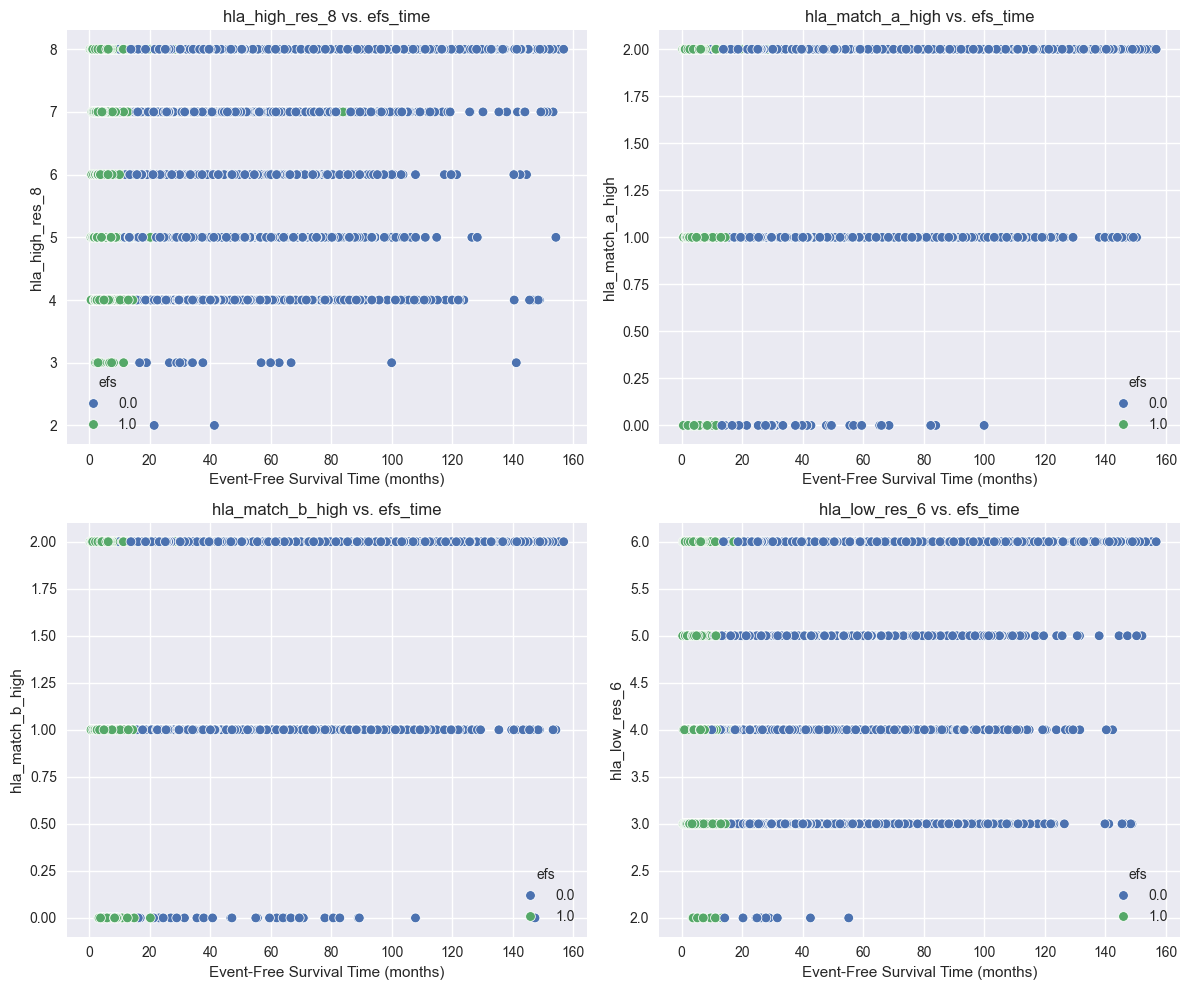

In [59]:
# Set up the second plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot scatter plots for each HLA feature vs. efs_time
for i, feature in enumerate(hla_features):
    sns.scatterplot(x='efs_time', y=feature, hue='efs', data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs. efs_time')
    axes[i].set_xlabel('Event-Free Survival Time (months)')
    axes[i].set_ylabel(feature)
    axes[i].legend(title='efs')

plt.tight_layout()
plt.show()

In [66]:
import pandas as pd

# Assuming df is the pandas DataFrame with the data loaded
# Get unique dri_score values from the data dictionary
dri_scores = [
    'Intermediate', 'High', 'N/A - non-malignant indication', 'N/A - pediatric',
    'High - TED AML case <missing cytogenetics', 'TBD cytogenetics', 'Low',
    'Intermediate - TED AML case <missing cytogenetics', 'N/A - disease not classifiable',
    'Very high', 'Missing disease status'
]

# Store results
results = []

for score in dri_scores:
    # Filter for patients with the current dri_score
    dri_df = df[df['dri_score'] == score]
    total_dri = len(dri_df)
    
    # 1. Probability of efs = 'Event' given dri_score
    efs_event_dri = len(dri_df[dri_df['efs'] == 1.0])
    prob_efs_given_dri = efs_event_dri / total_dri if total_dri > 0 else 0
    
    # 2. Probability of efs = 'Event' given dri_score AND arrhythmia = 'Yes'
    dri_arrhythmia_df = dri_df[dri_df['arrhythmia'] == 'Yes']
    total_dri_arrhythmia = len(dri_arrhythmia_df)
    efs_event_dri_arrhythmia = len(dri_arrhythmia_df[dri_arrhythmia_df['efs'] == 1.0])
    prob_efs_given_dri_and_arrhythmia = (efs_event_dri_arrhythmia / total_dri_arrhythmia 
                                         if total_dri_arrhythmia > 0 else 0)
    
    # Append results
    results.append({
        'DRI Score': score,
        'P(efs = Event | DRI Score)': prob_efs_given_dri,
        'P(efs = Event | DRI Score & Arrhythmia = Yes)': prob_efs_given_dri_and_arrhythmia,
        'Total Patients with DRI': total_dri,
        'Total Patients with DRI & Arrhythmia': total_dri_arrhythmia
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Display the results
print(results_df.to_string(index=False, float_format='{:.4f}'.format))

                                        DRI Score  P(efs = Event | DRI Score)  P(efs = Event | DRI Score & Arrhythmia = Yes)  Total Patients with DRI  Total Patients with DRI & Arrhythmia
                                     Intermediate                      0.5877                                         0.6728                    10436                                   541
                                             High                      0.7058                                         0.6979                     4701                                   235
                   N/A - non-malignant indication                      0.3885                                         0.4000                     2427                                    85
                                  N/A - pediatric                      0.3898                                         0.6051                     4779                                   157
        High - TED AML case <missing cytogenetics           

In [68]:
import pandas as pd

# Assuming df is the pandas DataFrame with the data loaded
# Get unique dri_score values from the data dictionary
dri_scores = [
    'Intermediate', 'High', 'N/A - non-malignant indication', 'N/A - pediatric',
    'High - TED AML case <missing cytogenetics', 'TBD cytogenetics', 'Low',
    'Intermediate - TED AML case <missing cytogenetics', 'N/A - disease not classifiable',
    'Very high', 'Missing disease status'
]

# Store results
results = []

for score in dri_scores:
    # Filter for patients with the current dri_score
    dri_df = df[df['dri_score'] == score]
    total_dri = len(dri_df)
    
    # 1. Probability of efs = 'Event' given dri_score
    efs_event_dri = len(dri_df[dri_df['efs'] == 1.0])
    prob_efs_given_dri = efs_event_dri / total_dri if total_dri > 0 else 0
    
    # 2. Probability of efs = 'Event' given dri_score AND mrd_hct = 'Yes'
    dri_arrhythmia_df = dri_df[dri_df['mrd_hct'] == 'Positive']
    total_dri_arrhythmia = len(dri_arrhythmia_df)
    efs_event_dri_arrhythmia = len(dri_arrhythmia_df[dri_arrhythmia_df['efs'] == 1.0])
    prob_efs_given_dri_and_arrhythmia = (efs_event_dri_arrhythmia / total_dri_arrhythmia 
                                         if total_dri_arrhythmia > 0 else 0)
    
    # Append results
    results.append({
        'DRI Score': score,
        'P(efs = Event | DRI Score)': prob_efs_given_dri,
        'P(efs = Event | DRI Score & mrd_hct = Yes)': prob_efs_given_dri_and_arrhythmia,
        'Total Patients with DRI': total_dri,
        'Total Patients with DRI & mrd_hct': total_dri_arrhythmia
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Display the results
print(results_df.to_string(index=False, float_format='{:.4f}'.format))

                                        DRI Score  P(efs = Event | DRI Score)  P(efs = Event | DRI Score & mrd_hct = Yes)  Total Patients with DRI  Total Patients with DRI & mrd_hct
                                     Intermediate                      0.5877                                      0.5661                    10436                               2807
                                             High                      0.7058                                      0.6950                     4701                                400
                   N/A - non-malignant indication                      0.3885                                      0.5111                     2427                                 90
                                  N/A - pediatric                      0.3898                                      0.4375                     4779                                240
        High - TED AML case <missing cytogenetics                      0.5870             

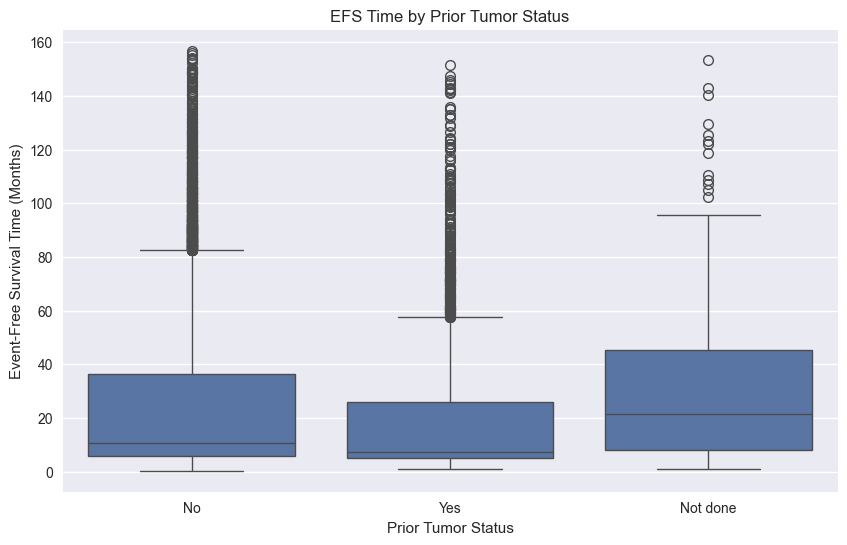

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='prior_tumor', y='efs_time', data=df)
plt.title('EFS Time by Prior Tumor Status')
plt.ylabel('Event-Free Survival Time (Months)')
plt.xlabel('Prior Tumor Status')
plt.show()

In [72]:
import pandas as pd

# Assuming df is the pandas DataFrame with the data loaded
# Get unique dri_score values from the data dictionary
dri_scores = [
    'Intermediate', 'High', 'N/A - non-malignant indication', 'N/A - pediatric',
    'High - TED AML case <missing cytogenetics', 'TBD cytogenetics', 'Low',
    'Intermediate - TED AML case <missing cytogenetics', 'N/A - disease not classifiable',
    'Very high', 'Missing disease status'
]

# Store results
results = []

for score in dri_scores:
    # Filter for patients with the current dri_score
    dri_df = df[df['dri_score'] == score]
    total_dri = len(dri_df)
    
    # 1. Probability of efs = 'Event' given dri_score
    efs_event_dri = len(dri_df[dri_df['efs'] == 1.0])
    prob_efs_given_dri = efs_event_dri / total_dri if total_dri > 0 else 0
    
    # 2. Probability of efs = 'Event' given dri_score AND prior_tumor = 'Yes'
    dri_arrhythmia_df = dri_df[dri_df['prior_tumor'] == 'Yes']
    total_dri_arrhythmia = len(dri_arrhythmia_df)
    efs_event_dri_arrhythmia = len(dri_arrhythmia_df[dri_arrhythmia_df['efs'] == 1.0])
    prob_efs_given_dri_and_arrhythmia = (efs_event_dri_arrhythmia / total_dri_arrhythmia 
                                         if total_dri_arrhythmia > 0 else 0)
    
    # Append results
    results.append({
        'DRI Score': score,
        'P(efs = Event | DRI Score)': prob_efs_given_dri,
        'P(efs = Event | DRI Score & prior_tumor = Yes)': prob_efs_given_dri_and_arrhythmia,
        'Total Patients with DRI': total_dri,
        'Total Patients with DRI & prior_tumor': total_dri_arrhythmia
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Display the results
print(results_df.to_string(index=False, float_format='{:.4f}'.format))

                                        DRI Score  P(efs = Event | DRI Score)  P(efs = Event | DRI Score & prior_tumor = Yes)  Total Patients with DRI  Total Patients with DRI & prior_tumor
                                     Intermediate                      0.5877                                          0.6852                    10436                                   1204
                                             High                      0.7058                                          0.7904                     4701                                    706
                   N/A - non-malignant indication                      0.3885                                          0.5482                     2427                                    197
                                  N/A - pediatric                      0.3898                                          0.5978                     4779                                    363
        High - TED AML case <missing cytogenetics 

ValueError: Values must be numeric: no strings, datetimes, objects, etc.

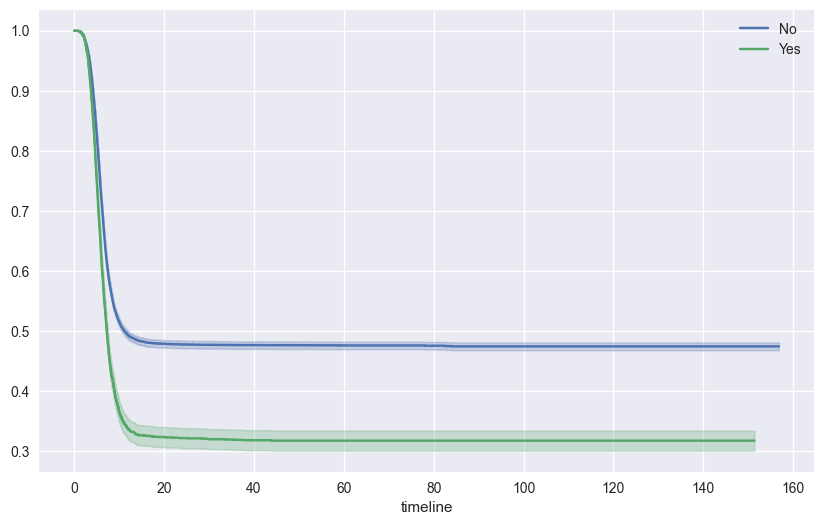

In [77]:
# Assuming df is the pandas DataFrame with the data
# Calculate the probability of efs == 1.0 for each melphalan_dose category
probabilities = df.groupby('melphalan_dose')['efs'].apply(lambda x: (x == 1.0).mean()).fillna(0)

# Display the results
print("Probability of efs == 1.0 given melphalan_dose:")
for dose, prob in probabilities.items():
    print(f"{dose}: {prob:.4f}")

Probability of efs == 1.0 given melphalan_dose:
MEL: 0.5460
N/A, Mel not given: 0.5389


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


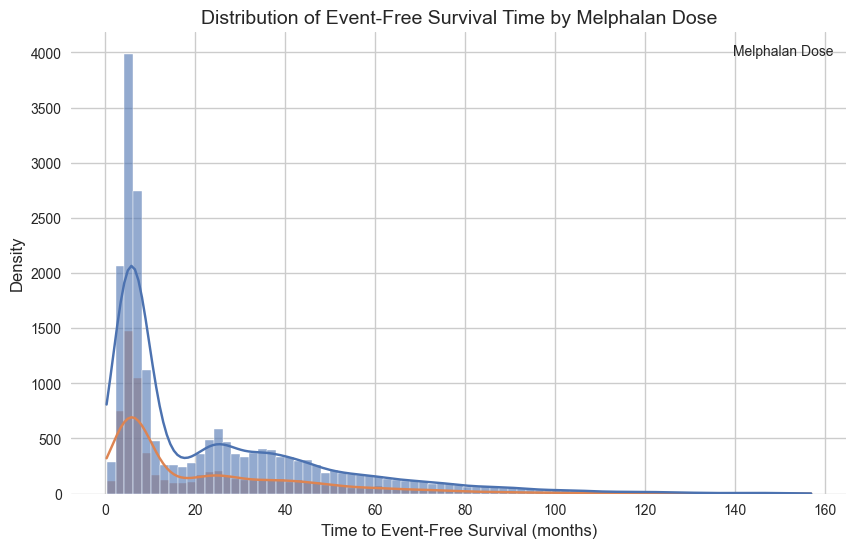

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is the pandas DataFrame with the data
# Set the style for better aesthetics
sns.set_style("whitegrid")

# Create a distribution plot (histogram + KDE) of efs_time, color-coded by melphalan_dose
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="efs_time", hue="melphalan_dose", kde=True, palette="deep", alpha=0.6)

# Customize the plot
plt.title("Distribution of Event-Free Survival Time by Melphalan Dose", fontsize=14)
plt.xlabel("Time to Event-Free Survival (months)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Melphalan Dose")

# Show the plot
plt.show()